### These plots were created using the Plotly library.

In [89]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
from plotly.widgets import GraphWidget
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("../data/cleaned_data.csv", encoding='latin-1')

In [3]:
data.head(3).transpose()

,0,1,2
budget,237000000,300000000,245000000
genres,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Adventure', 'Fantasy', 'Action']","['Action', 'Adventure', 'Crime']"
keywords,"['culture clash', 'future', 'space war', 'spac...","['ocean', 'drug abuse', 'exotic island', 'east...","['spy', 'based on novel', 'secret agent', 'seq..."
original_language,en,en,en
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bonds past sends him o...
popularity,150.438,139.083,107.377
production_companies,"['Ingenious Film Partners', 'Twentieth Century...","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['Columbia Pictures', 'Danjaq', 'B24']"
production_countries,"['United States of America', 'United Kingdom']",['United States of America'],"['United Kingdom', 'United States of America']"
release_date,2009-12-10,2007-05-19,2015-10-26
revenue,2787965087,961000000,880674609


In [4]:
data.shape

(4791, 25)

In [5]:
data["profit"] = data["revenue"] - data["budget"]

In [6]:
data["profit"].describe()

count    4.791000e+03
mean     5.335286e+07
std      1.361101e+08
min     -1.657101e+08
25%     -7.980955e+05
50%      2.601043e+06
75%      5.545616e+07
max      2.550965e+09
Name: profit, dtype: float64

In [7]:
data[data["profit"]==data["profit"].max()]

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,crew,actor1,actor2,actor3,director,year,month,day,dow,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,...,"[{'credit_id': '52fe48009251416c750aca23', 'de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron,2009,12,10,3,2550965087


### Average Profit by Day of Week

In [8]:
profit_by_dow = data[data["year"]>1990].groupby(["dow"]).profit.mean().reset_index()

In [9]:
bar_data = [go.Bar(x=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']\
                   , y=profit_by_dow["profit"])]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Average Revenue by Day of Week',
               'xaxis': {
                 'title': 'Day of Week'},
               'yaxis': {
                'title': 'Profit'}
        }})

In [10]:
profit_by_month = data.groupby(["month"]).profit.mean().reset_index()

In [11]:
profit_by_month

,month,profit
0,1,1.436594e+07
1,2,3.129524e+07
2,3,4.375326e+07
3,4,4.731362e+07
4,5,9.402660e+07
5,6,1.087374e+08
6,7,7.281449e+07
7,8,3.221319e+07
8,9,2.278217e+07
9,10,3.152965e+07


### Violin Plots for Movie Ratings by Decade

In [12]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [13]:
data["decade"] = data["year"].apply(extract_decade)

In [14]:
df = data

In [15]:
df = df.sort_values(by=['decade'], ascending=True)

In [16]:
df = df[df['decade'] != '1910s']

In [17]:
df_by_vote = df.groupby(['decade']).vote_count.sum().reset_index()

In [18]:
df_by_vote

,decade,vote_count
0,1920s,742
1,1930s,6182
2,1940s,7325
3,1950s,7203
4,1960s,27730
5,1970s,62479
6,1980s,146993
7,1990s,436488
8,2000s,1195879
9,2010s,1423974


In [19]:
bar_data = [go.Bar(x=df_by_vote['decade']\
                   , y=df_by_vote["vote_count"],
                     marker=dict(
                        color='rgb(127,188,65)'
                    ))]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Vote Count for each Decade',
               'xaxis': {
                 'title': 'Decade'},
               'yaxis': {
                'title': 'Total Votes'}
        }})

In [20]:
df[df['decade'] == '1910s']

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,actor1,actor2,actor3,director,year,month,day,dow,profit,decade


Get rid of the 1910's decade since it has only 1 movie

In [21]:
df = df[df['decade'] != '1910s']

In [22]:
da = []
for i in range(0,len(pd.unique(df['decade']))):
    trace = {
            "type": 'violin',
            "x": df['decade'][df['decade'] == pd.unique(df['decade'])[i]],
            "y": df['vote_average'][df['decade'] == pd.unique(df['decade'])[i]],
            "name": pd.unique(df['decade'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    da.append(trace)

        
fig = {
    "data": da,
    "layout" : {
        "title": "Average Movie Ratings by Decade",
            "xaxis" : dict(title = 'Decade', autotick=False, showticklabels=True),
            "yaxis" : dict(title = 'Average Rating')
    }
}

iplot(fig, validate = False)

In [23]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'actor1',
       'actor2', 'actor3', 'director', 'year', 'month', 'day', 'dow', 'profit',
       'decade'],
      dtype='object')

### Bubble Chart for Profit vs Budget

In [24]:
min(df.budget.values)

0

In [25]:
min(df[df.budget>10000].budget.values)

12000

In [27]:
layout = go.Layout(
    title='Profit vs. Budget',
    xaxis=dict(
        title='Budget',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 4e8],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=df[df.budget>5000].budget.values, # Budget
    y=df[df.budget>5000].profit.values,  # Gross
    mode='markers',
    text= df[df.budget>5000].title.values, # Movie Titles
    marker=dict(
        size=3*(df[df.budget>5000].vote_average),
        sizeref=1.0,
        color=df[df.budget>5000].vote_average.values,
                
        colorbar=ColorBar(title='Average Rating<br> &nbsp;' , tickvals=[0,1.5,3,5,7,8.5]),

        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:174: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.




In [28]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'actor1',
       'actor2', 'actor3', 'director', 'year', 'month', 'day', 'dow', 'profit',
       'decade'],
      dtype='object')

In [29]:
df.head().transpose()

,2638,4449,4651,4584,4211
budget,92620000,0,245000,379000,1500000
genres,"['Drama', 'Science Fiction']","['Drama', 'Thriller', 'Romance']","['Drama', 'Romance', 'War']","['Drama', 'Music', 'Romance']","['Comedy', 'Drama']"
keywords,"['man vs machine', 'underground world', 'inven...","['london england', 'casino', 'irony', 'forbidd...","['world war i', 'silent film']","['musical', 'singer', 'pre-code', 'wisecrack h...","['corruption', 'washington d.c.', 'senate', 's..."
original_language,de,de,en,en,en
overview,In a futuristic city sharply divided between t...,The rise and inevitable fall of an amoral but ...,The story of an idle rich boy who joins the US...,"Harriet and Queenie Mahoney, a vaudeville act,...","Naive and idealistic Jefferson Smith, leader o..."
popularity,32.3515,1.82418,0.785744,0.968865,12.2624
production_companies,"['Paramount Pictures', 'Universum Film (UFA)']",['Nero Films'],['Metro-Goldwyn-Mayer (MGM)'],['Metro-Goldwyn-Mayer (MGM)'],['Columbia Pictures']
production_countries,['Germany'],['Germany'],['United States of America'],['United States of America'],['United States of America']
release_date,1927-01-10,1929-01-30,1925-11-05,1929-02-08,1939-10-19
revenue,650422,0,22000000,4358000,9600000


Remove movies with a runtime of 0

### Bubble Chart for Profit vs Runtime

In [30]:
df2 = df[df.runtime > 20]

In [31]:
layout = go.Layout(
    title='Profit vs. Runtime',
    xaxis=dict(
        title='Runtime',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 250],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=df2.runtime.values, # Budget
    y=df2.profit.values,  # Gross
    mode='markers',
    text= df2.title.values, # Movie Titles
    marker=dict(
        size=3*(df2.vote_average),
        sizeref=1.0,
        color=df2.vote_average.values,
        colorbar=ColorBar(title='Average Rating<br> &nbsp;'),
        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:174: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.




### Directors with the highest average profit and movie ratings

In [33]:
data = pd.read_csv("../data/cleaned_data.csv", encoding='latin-1')
data["profit"] = data["revenue"] - data["budget"]

In [34]:
df = data

In [35]:
director_df = df.groupby('director', as_index=False)
director_df = director_df.mean()

In [36]:
name_counts = df['director'].value_counts().to_dict() # dictionary of director and number of rows/movies per
name_counts

{'Steven Spielberg': 27,
 'Woody Allen': 21,
 'Clint Eastwood': 20,
 'Martin Scorsese': 20,
 'Ridley Scott': 16,
 'Robert Rodriguez': 16,
 'Spike Lee': 16,
 'Steven Soderbergh': 15,
 'Renny Harlin': 15,
 'Oliver Stone': 14,
 'Tim Burton': 14,
 'Joel Schumacher': 13,
 'Robert Zemeckis': 13,
 'Barry Levinson': 13,
 'Ron Howard': 13,
 'Francis Ford Coppola': 12,
 'Tony Scott': 12,
 'Kevin Smith': 12,
 'Michael Bay': 12,
 'Brian De Palma': 12,
 'Chris Columbus': 11,
 'Richard Linklater': 11,
 'Sam Raimi': 11,
 'Joel Coen': 11,
 'Shawn Levy': 11,
 'Bobby Farrelly': 11,
 'Rob Reiner': 11,
 'Richard Donner': 11,
 'Paul W.S. Anderson': 10,
 'Wes Craven': 10,
 'Stephen Frears': 10,
 'David Fincher': 10,
 'John Carpenter': 10,
 'John McTiernan': 10,
 'Tyler Perry': 9,
 'Dennis Dugan': 9,
 'Brett Ratner': 9,
 'Peter Jackson': 9,
 'M. Night Shyamalan': 9,
 'Phillip Noyce': 9,
 'Lasse Hallström': 9,
 'Rob Cohen': 9,
 'Stephen Herek': 8,
 'Garry Marshall': 8,
 'David O. Russell': 8,
 'Antoine Fuqua'

In [37]:
director_df['film_count'] = director_df['director'].map(name_counts) # match the film count to the director

In [38]:
director_df.head(3)

,director,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,day,dow,profit,film_count
0,Aaron Hann,0.0,6.752141,0.0,87.0,6.0,333.0,2015.0,10.0,2.0,4.0,0.0,1
1,Aaron Schneider,7500000.0,6.557643,0.0,103.0,6.5,100.0,2010.0,1.0,22.0,4.0,-7500000.0,1
2,Abel Ferrara,12500000.0,2.950618,1227324.0,99.0,7.3,31.0,1996.0,1.0,26.0,4.0,-11272676.0,1


In [39]:
director_df.sort_values('profit', ascending=False, inplace=True)

In [40]:
director_df['director+count'] = director_df['director'].map(str) + " (" + director_df['film_count'].map(str) + ")"

In [41]:
director_df.head(3)

,director,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,day,dow,profit,film_count,director+count
318,Chris Buck,150000000.0,165.125366,1.274219e+09,102.0,7.3,5295.0,2013.0,11.0,27.0,2.0,1.124219e+09,1,Chris Buck (1)
1282,Kyle Balda,74000000.0,875.581305,1.156731e+09,91.0,6.4,4571.0,2015.0,6.0,17.0,2.0,1.082731e+09,1,Kyle Balda (1)
1306,Lee Unkrich,200000000.0,59.995418,1.066970e+09,103.0,7.6,4597.0,2010.0,6.0,16.0,2.0,8.669697e+08,1,Lee Unkrich (1)


In [42]:
dir_means = director_df[['director+count',  'film_count', 'profit']]

In [43]:
dir_means.head(3)

,director+count,film_count,profit
318,Chris Buck (1),1,1.124219e+09
1282,Kyle Balda (1),1,1.082731e+09
1306,Lee Unkrich (1),1,8.669697e+08


In [44]:
dir_subset = director_df[director_df['film_count'] > 5]

Average profit and movie rating for directors who have produced more than 5 movies

In [45]:
top10pro = dir_subset.sort_values(ascending = False, by = 'profit')[['director+count','profit']].head(10)
top10pro.head(3)

,director+count,profit
881,James Cameron (7),7.338099e+08
1732,Peter Jackson (9),5.784048e+08
360,Christopher Nolan (8),4.028104e+08


In [46]:
top10rat = dir_subset.sort_values(ascending = False, by = 'vote_average')[['director+count', 'vote_average']].head(10)
top10rat.head(3)

,director+count,vote_average
360,Christopher Nolan (8),7.800000
1773,Quentin Tarantino (8),7.775000
2050,Stanley Kubrick (6),7.683333


In [47]:
y=top10pro['director+count']

In [48]:
data = [go.Bar(
            x=top10pro['profit'],
            y=top10pro['director+count'],
            orientation = 'h',
            marker=dict(
            color='rgb(127,205,187)'
        )
)]

layout = dict(
        title='Average Profit for Directors who have directed more than 5 movies',
        margin=go.Margin(
        l=210,
        r=100,
        pad=1),
        xaxis=dict(
            title='Average Profit'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Director (Number of Movies)',
            tickfont=dict(
                size=12,
            )
        )
    
    )
    

fig = go.Figure(data = data, layout = layout)

iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [49]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top10rat['vote_average'],
            y=top10rat['director+count'],
            orientation = 'h',
            marker=dict(
            color='rgb(67,162,202)'
        )
)]

layout = dict(
        title='Average Movie Rating for Directors who have directed more than 5 movies',
        margin=go.Margin(
        l=210,
        r=100,
        b=100,
        t=100,
        pad=1),
            xaxis=dict(
            title='Average Rating'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Director (Number of Movies)',
            tickfont=dict(
                size=12,
            )
        )
    
    )

fig = go.Figure(data = data, layout = layout)

iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### Network Graph of main actors

title year is the year the movie was released
actor1 is actor_1 and so on

df_appearance = df_reduced[['actor_1_name', 'title_year']].groupby('actor_1_name').count()
appearance df is grouping the actor1 name and year of movie by the name, and seeing the count of number of movies an actor has had in a specific year

only want actors who have appeared in more than 4 movies per year
selection = df_appearance['title_year'] > 4

most_prolific = df_actors[selection] # these actors



In [50]:
df_reduced = df[['actor1', 'vote_average',
                 'year', 'title']].reset_index(drop = True)

In [51]:
df_appearance = df[['actor1', 'year']].groupby('actor1').count().reset_index()

In [52]:
most_prolific = list(df_appearance['actor1'][np.array(df_appearance['year'] > 3)])

In [53]:
len(most_prolific)

277

In [54]:
subset1 = df[df.actor1.isin(most_prolific) &\
            df.actor2.isin(most_prolific) & df.actor3.isin(most_prolific)].reset_index(drop = True)

In [55]:
subset2 = df[df.actor1.isin(most_prolific) |\
            df.actor2.isin(most_prolific) | df.actor3.isin(most_prolific)].reset_index(drop = True)

In [56]:
subset1.shape

(227, 26)

In [57]:
subset1

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,crew,actor1,actor2,actor3,director,year,month,day,dow,profit
0,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",en,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,...,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christian Bale,Michael Caine,Gary Oldman,Christopher Nolan,2012,7,16,0,834939099
1,258000000,"['Fantasy', 'Action', 'Adventure']","['dual identity', 'amnesia', 'sandstorm', ""lov...",en,The seemingly invincible Spider-Man goes up ag...,115.699814,"['Columbia Pictures', 'Laura Ziskin Production...",['United States of America'],2007-05-01,890871626,...,"[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",Tobey Maguire,Kirsten Dunst,James Franco,Sam Raimi,2007,5,1,1,632871626
2,225000000,"['Action', 'Comedy', 'Science Fiction']","['time travel', 'time machine', 'alien', 'fict...",en,Agents J (Will Smith) and K (Tommy Lee Jones) ...,52.035179,"['Amblin Entertainment', 'Media Magik Entertai...",['United States of America'],2012-05-23,624026776,...,"[{'credit_id': '52fe45b7c3a36847f80d68c7', 'de...",Will Smith,Tommy Lee Jones,Josh Brolin,Barry Sonnenfeld,2012,5,23,2,399026776
3,207000000,"['Adventure', 'Drama', 'Action']","['film business', 'screenplay', 'show business...",en,"In 1933 New York, an overly ambitious movie pr...",61.226010,"['WingNut Films', 'Universal Pictures', 'Big P...","['New Zealand', 'United States of America', 'G...",2005-12-14,550000000,...,"[{'credit_id': '52fe422ec3a36847f800a1d7', 'de...",Naomi Watts,Jack Black,Adrien Brody,Peter Jackson,2005,12,14,2,343000000
4,250000000,"['Adventure', 'Action', 'Science Fiction']","['civil war', 'war', 'marvel comic', 'sequel',...",en,"Following the events of Age of Ultron, the col...",198.372395,"['Studio Babelsberg', 'Marvel Studios', 'Walt ...",['United States of America'],2016-04-27,1153304495,...,"[{'credit_id': '569443d59251414b67000428', 'de...",Chris Evans,Robert Downey Jr.,Scarlett Johansson,Anthony Russo,2016,4,27,2,903304495
5,200000000,"['Action', 'Adventure', 'Thriller']","['spy', 'secret agent', 'sociopath', 'killer',...",en,When Bond's latest assignment goes gravely wro...,93.004993,['Columbia Pictures'],"['United Kingdom', 'United States of America']",2012-10-25,1108561013,...,"[{'credit_id': '52fe46689251416c910537ad', 'de...",Daniel Craig,Judi Dench,Javier Bardem,Sam Mendes,2012,10,25,3,908561013
6,200000000,"['Action', 'Adventure', 'Fantasy']","['dual identity', ""love of one's life"", 'pizza...",en,Peter Parker is going through a major identity...,35.149586,"['Columbia Pictures', 'Laura Ziskin Production...",['United States of America'],2004-06-25,783766341,...,"[{'credit_id': '52fe4252c3a36847f8015039', 'de...",Tobey Maguire,Kirsten Dunst,James Franco,Sam Raimi,2004,6,25,4,583766341
7,200000000,"['Action', 'Science Fiction', 'Thriller']","['saving the world', 'artificial intelligence'...",en,"All grown up in post-apocalyptic 2018, John Co...",71.862892,"['Columbia Pictures', 'The Halcyon Company', '...","['Germany', 'Italy', 'United Kingdom', 'United...",2009-05-20,371353001,...,"[{'credit_id': '52fe424ec3a36847f8013ffd', 'de...",Christian Bale,Sam Worthington,Anton Yelchin,McG,2009,5,20,2,171353001
8,190000000,['Action'],"['car race', 'speed', 'revenge', 'suspense', '...",en,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"['Universal Pictures', 'Original Film', 'Fuji ...","['Japan', 'United States of America']",2015-04-01,1506249360,...,"[{'credit_id': '52fe4cc8c3a36847f823e699', 'de...",Vin Diesel,Paul Walker,Dwayne Johnson,James Wan,2015,4,1,2,1316249360
9,250000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['1970s', 'mutant', 'time travel', 'marvel com...",en,The ultimate X-Men ensemble fights a war for t...,118.0

### Top Actor Comparison

In [71]:
features = []
for item in imp_actors:
    group = df.loc[(df['actor1'] == item) | (df['actor2']== item) ]
    features.append((item, group.profit.mean(), group.vote_average.mean(), group.popularity.mean(), d[item]))

In [72]:
top15 = pd.DataFrame(features)

In [73]:
top15

,0,1,2,3,4
0,Scarlett Johansson,2.916515e+07,6.437500,33.564579,13
1,Russell Crowe,7.690823e+07,6.600000,33.467027,13
2,Cameron Diaz,1.206145e+08,5.994118,38.642755,14
3,Tom Cruise,2.369365e+08,6.646154,48.156016,14
4,Brad Pitt,1.353495e+08,6.813793,48.674368,14
5,Matt Damon,9.884363e+07,6.636364,36.726481,14
6,Meryl Streep,8.384653e+07,6.482609,25.091077,14
7,Christian Bale,1.388917e+08,6.935000,55.938757,15
8,Jude Law,5.998734e+07,6.371429,29.928448,15
9,Kate Winslet,1.448356e+08,7.007143,30.104512,15


In [74]:
top15.columns = ["Actor","Avg. Profit", "Avg. Vote", "Avg. Popularity", "Connections with Other Important Actors)"]


In [75]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top15['Avg. Profit'],
            y=top15['Actor'],
            orientation = 'h',
            marker=dict(
            color='rgb(127,205,187)'
        )
)]

layout = dict(
        title='Average Profit for Important Actors (Ordered by Connections)',
        margin=go.Margin(
        l=210,
        r=100,
        pad=1),
        xaxis=dict(
            title='Average Profit'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Actors',
            tickfont=dict(
                size=12,
            )
        )
    
    )
    

fig = go.Figure(data = data, layout = layout)

iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [76]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top15['Avg. Popularity'],
            y=top15['Actor'],
            orientation = 'h',
            marker=dict(
            color='rgb(127,205,187)'
        )
)]

layout = dict(
        title='Average Popularity for Important Actors (Ordered by Connections)',
        margin=go.Margin(
        l=210,
        r=100,
        pad=1),
        xaxis=dict(
            title='Average Vote'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Actors',
            tickfont=dict(
                size=12,
            )
        )
    
    )
    

fig = go.Figure(data = data, layout = layout)

iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [77]:
top15['Actor1'] = top15['Actor']+ " ("+ top15['Connections with Other Important Actors)'].astype('str') + ")"

In [78]:
trace1 = go.Bar(    y=top15["Actor1"],
                        orientation = 'h',
                        x=top15["Avg. Profit"]/1000000,
                        name='Profit',
                        marker=dict(
                    color='rgb(161,215,106)'
                ))
                        

trace2 = go.Bar(y=top15["Actor1"],
                   orientation = 'h',
                    x=top15["Avg. Popularity"],
                    marker=dict(
                        color='rgb(37,52,148)'
                        #color='rgb(65,182,196)'
                    ),
                    name='Popularity')
                

trace3 = go.Bar(y=top15["Actor1"],
                   orientation = 'h',
                    x=top15["Avg. Vote"]*10,
                    name='Vote',
                    marker=dict(
                        #color='rgb(37,52,148)'
                        color='rgb(65,182,196)'
                    )
               )


data = [trace1, trace2, trace3]


updatemenus = list([
    dict(active=-1,
         x=-0.3,
         buttons=list([  
             
            dict(
                label = 'Average Profit (in Millions)',
                 method = 'update',
                 args = [{'visible': [True, False, False]}, 
                     {'title': 'Average Profit'}]),
             
             dict(
                  label = 'Average Popularity',
                 method = 'update',
                 args = [{'visible': [False, True, False]},
                     {'title': 'Average Popularity'}]),

            dict(
                 label = 'Average Vote',
                 method = 'update',
                 args = [{'visible': [False, False, True]},
                     {'title': 'Average Vote'}])
        ]),
    )
])

layout = dict(title='Average Measures for Important Actors (Select from Dropdown)', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)

iplot(fig)

In [79]:
data = pd.read_csv("../data/cleaned_data.csv", encoding='latin-1')

In [80]:
data["profit"] = data["revenue"] - data["budget"]
data

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,crew,actor1,actor2,actor3,director,year,month,day,dow,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,...,"[{'credit_id': '52fe48009251416c750aca23', 'de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron,2009,12,10,3,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,...,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Johnny Depp,Orlando Bloom,Keira Knightley,Gore Verbinski,2007,5,19,5,661000000
2,245000000,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...",en,A cryptic message from Bonds past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,...,"[{'credit_id': '54805967c3a36829b5002c41', 'de...",Daniel Craig,Christoph Waltz,Léa Seydoux,Sam Mendes,2015,10,26,0,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",en,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,...,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christian Bale,Michael Caine,Gary Oldman,Christopher Nolan,2012,7,16,0,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",en,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,...,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Taylor Kitsch,Lynn Collins,Samantha Morton,Andrew Stanton,2012,3,7,2,24139100
5,258000000,"['Fantasy', 'Action', 'Adventure']","['dual identity', 'amnesia', 'sandstorm', ""lov...",en,The seemingly invincible Spider-Man goes up ag...,115.699814,"['Columbia Pictures', 'Laura Ziskin Production...",['United States of America'],2007-05-01,890871626,...,"[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",Tobey Maguire,Kirsten Dunst,James Franco,Sam Raimi,2007,5,1,1,632871626
6,260000000,"['Animation', 'Family']","['hostage', 'magic', 'horse', 'fairy tale', 'm...",en,When the kingdom's most wanted-and most charmi...,48.681969,"['Walt Disney Pictures', 'Walt Disney Animatio...",['United States of America'],2010-11-24,591794936,...,"[{'credit_id': '52fe46db9251416c91062101', 'de...",Zachary Levi,Mandy Moore,Donna Murphy,Byron Howard,2010,11,24,2,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']","['marvel comic', 'sequel', 'superhero', 'based...",en,When Tony Stark tries to jumpstart a dormant p...,134.279229,"['Marvel Studios', 'Prime Focus', 'Revolution ...",['United States of America'],2015-04-22,1405403694,...,"[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Joss Whedon,2015,4,22,2,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']","['witch', 'magic', 'broom', 'school of witchcr...",en,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"['Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",2009-07-07,933959197,...,"[{'credit_id': '52fe4273c3a36847f801fab1', 'de...",Daniel Radcliffe,Rupert Grint,Emma Watson,David Yates,2009,7,7,1,683959197
9,250000000,"['Action', 'Adventure', 'Fantasy']","['dc comics', 'vigilante', 'superhero', 'based...",en,Fearing the actions of a god-like Super Hero l...,155.790452,"

### Genre Exploration

In [82]:
df1 = pd.concat([pd.Series(row['year'], row['genres'].replace('[','').replace(']','').replace("'","").split(','))              
                    for _, row in data[data["year"]>1990][["year","genres"]].iterrows()]).reset_index()
df2 = pd.concat([pd.Series(row['profit'], row['genres'].replace('[','').replace(']','').replace("'","").split(','))              
                    for _, row in data[data["year"]>1990][["profit","genres"]].iterrows()]).reset_index()

In [84]:
df1.columns = ["genres","year"]
df2.columns = ["genres","profit"]
df1.shape, df2.shape

((10726, 2), (10726, 2))

In [85]:
df1["profit"] = df2["profit"]
df1["genres"] = df1["genres"].apply(lambda x: x.strip())
del df2

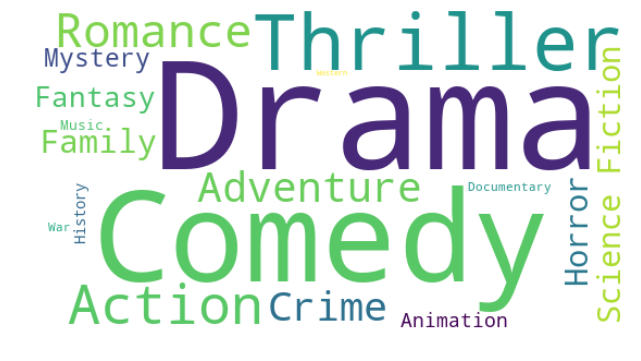

In [96]:
words = dict()
trunc_occurences = df1.groupby(["genres"]).size().sort_values(ascending=False).reset_index()
trunc_occurences.columns = ["genres", "frequency"]
for i in range(18):
    words[trunc_occurences["genres"][i]] = trunc_occurences["frequency"][i]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Finding Correlation between Profit & Popularity

In [97]:
data["profit"].corr(data["popularity"])

0.6206542620057857

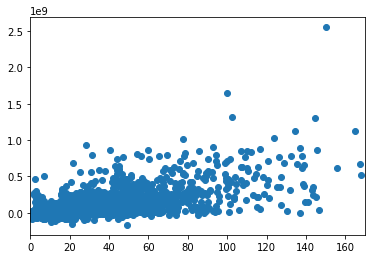

In [98]:
plt.scatter(data["popularity"],data["profit"])
plt.xlim([0,170])
plt.show()